https://datahack.analyticsvidhya.com/contest/black-friday/

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Submissions are scored on the root mean squared error (RMSE)

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [347]:
# Load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
# Dealing with object columns
df_train.select_dtypes('object').head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [348]:
# Label encode object columns to perform EDA
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Gender'] = le.fit_transform(df_train['Gender'])
df_train['Age'] = le.fit_transform(df_train['Age'])
df_train['City_Category'] = le.fit_transform(df_train['City_Category'])
df_train['Stay_In_Current_City_Years'] = le.fit_transform(df_train['Stay_In_Current_City_Years'])


In [349]:
# Fill Na product categories with 0 
df_train.fillna(value=0, inplace=True)

#### EDA

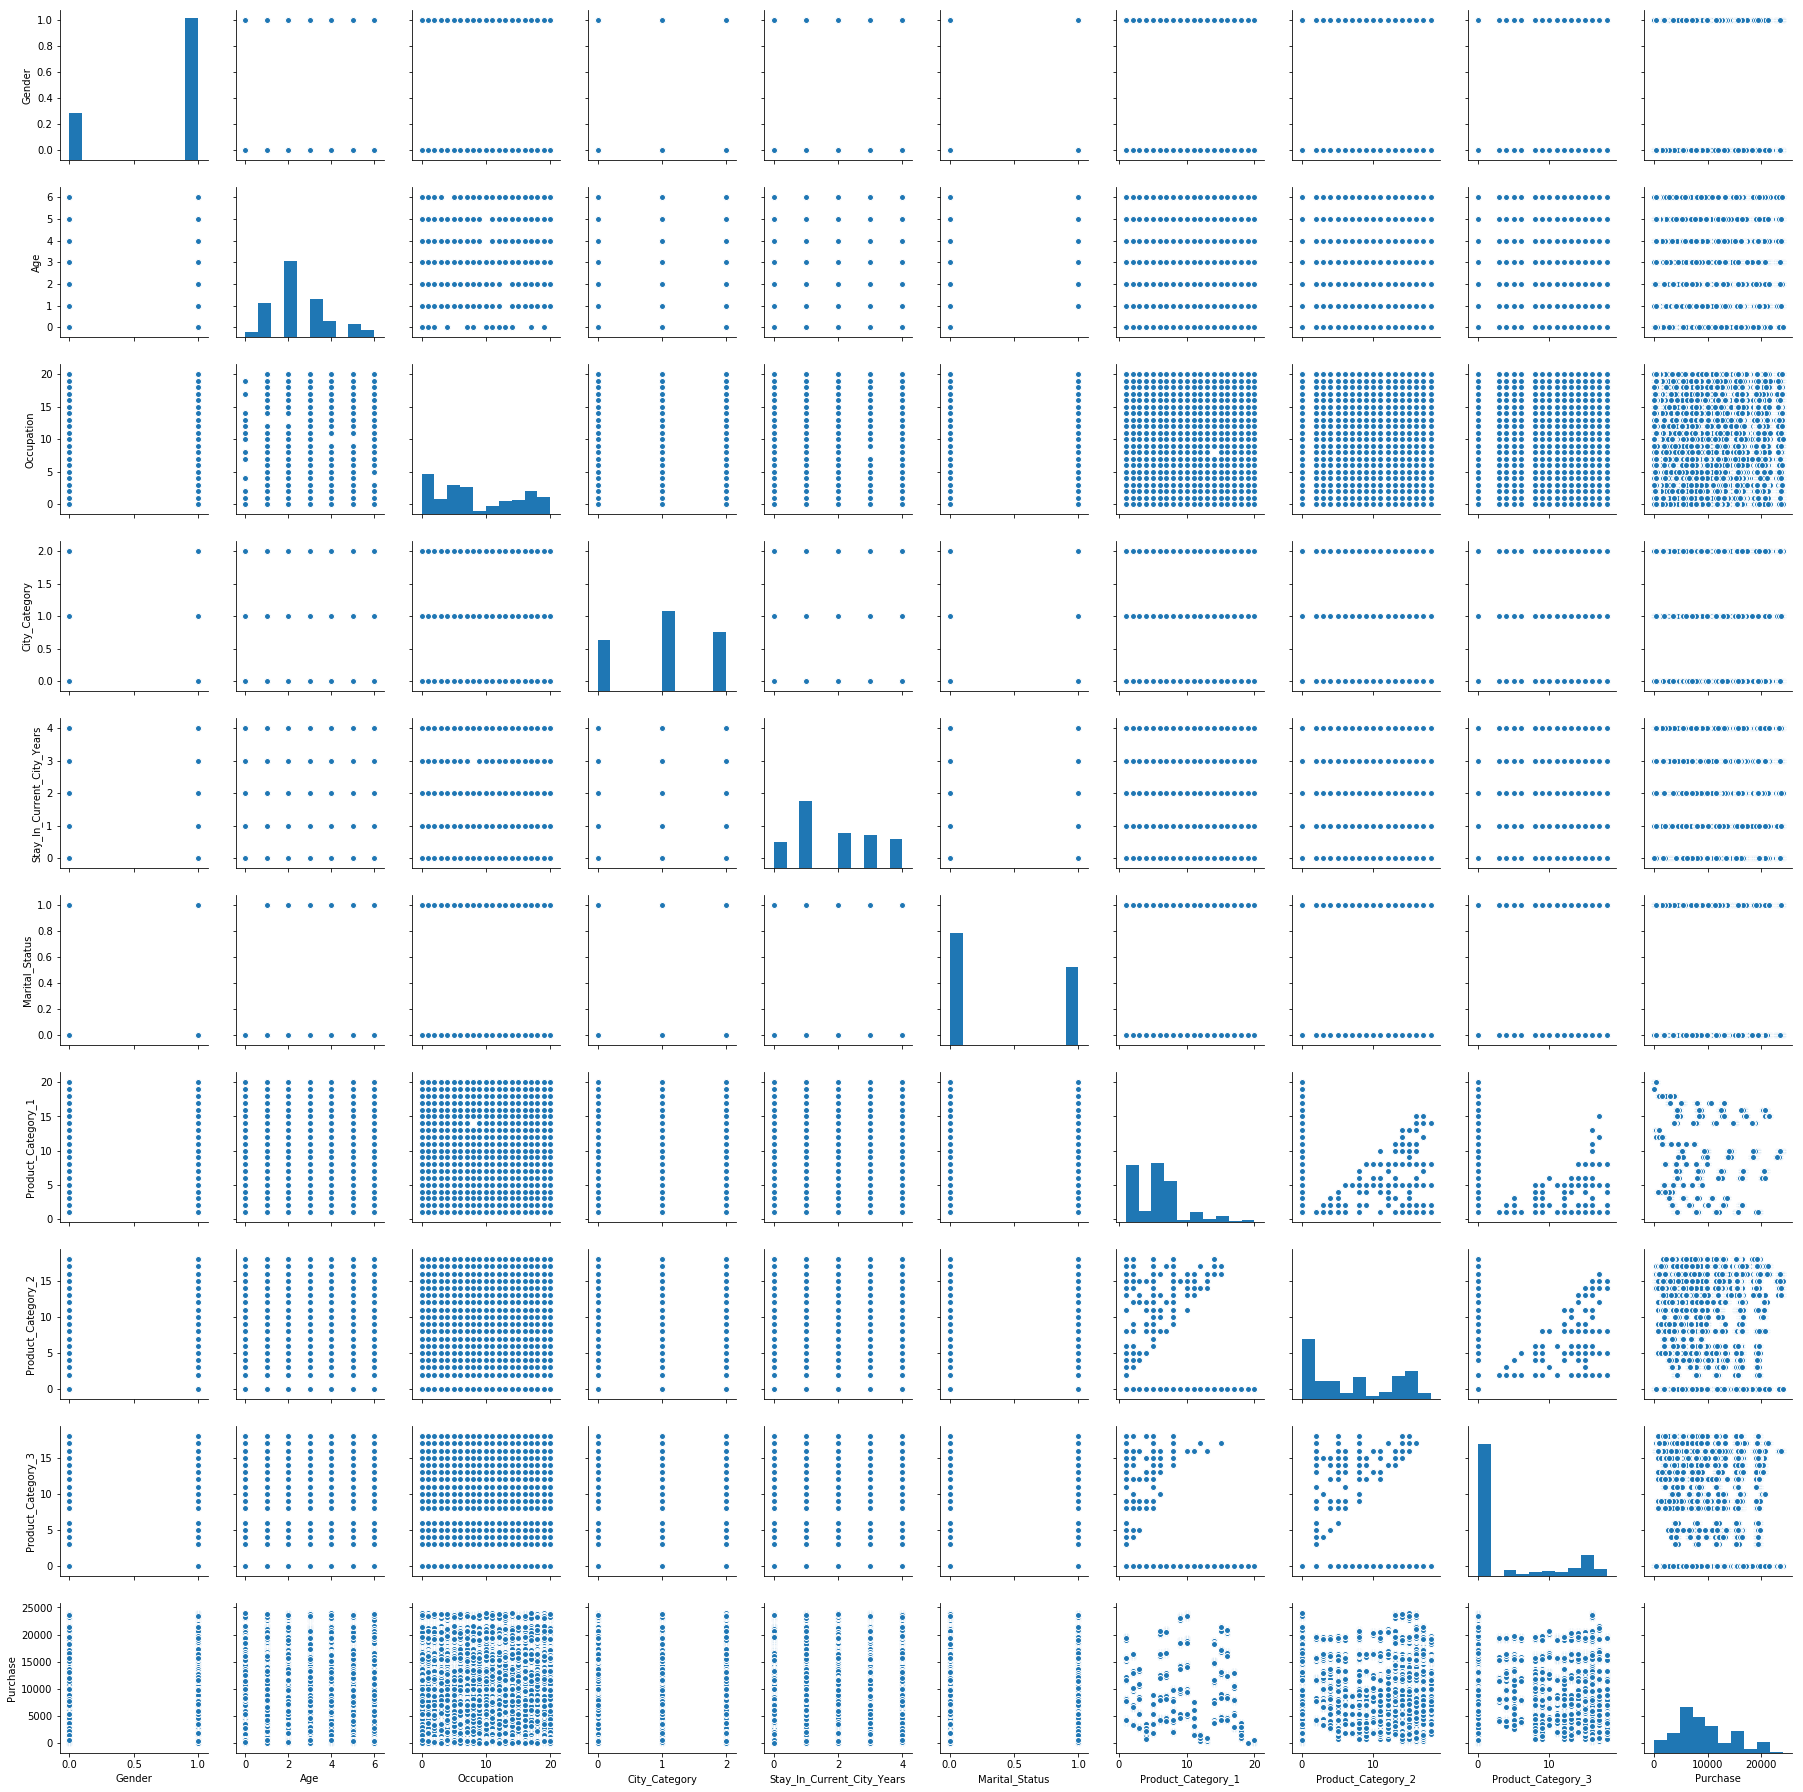

In [448]:
#sns.pairplot(df_train)

In [358]:
# Gender, occupation, and product_categories 1-3 are not normally distributed
print('Gender Value Counts: ', df_train['Gender'].value_counts())
print('Occupation Value Counts: ', df_train['Occupation'].value_counts())
print('Product_Category_1 Value Counts: ', df_train['Product_Category_1'].value_counts())
print('Product_Category_2 Value Counts: ', df_train['Product_Category_2'].value_counts())
print('Product_Category_3 Value Counts: ', df_train['Product_Category_3'].value_counts())

Gender Value Counts:  1    414259
0    135809
Name: Gender, dtype: int64
Occupation Value Counts:  4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
Product_Category_1 Value Counts:  5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64
Product_Category_2 Value Counts:  0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2

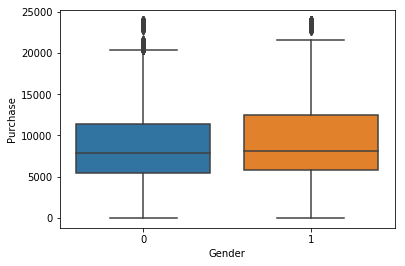

In [352]:
sns.boxplot(y=df_train['Purchase'], x=df_train['Gender'])

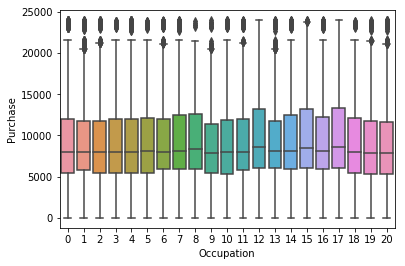

In [359]:
sns.boxplot(y=df_train['Purchase'], x=df_train['Occupation'])

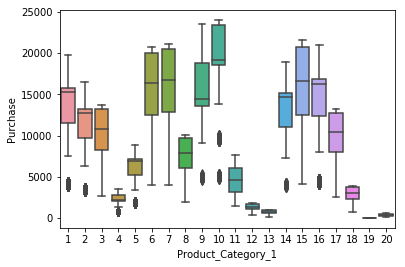

In [360]:
sns.boxplot(y=df_train['Purchase'], x=df_train['Product_Category_1'])

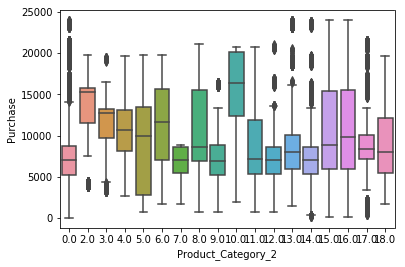

In [364]:
sns.boxplot(y=df_train['Purchase'], x=df_train['Product_Category_2'])

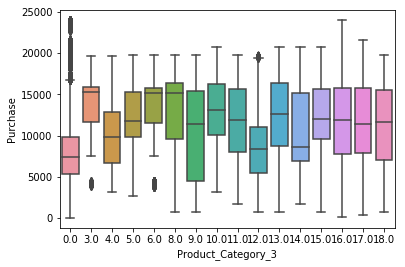

In [363]:
sns.boxplot(y=df_train['Purchase'], x=df_train['Product_Category_3'])

In [375]:
print('Average Spent for Product Category 1: ', df_train.groupby('Product_Category_1')['Purchase'].mean().sort_values())
print('Number purchased for Product Category 1: ', df_train.groupby('Product_Category_1')['Purchase'].count().sort_values())

Average Spent for Product Category 1:  Product_Category_1
19       37.041797
20      370.481176
13      722.400613
12     1350.859894
4      2329.659491
18     2972.864320
11     4685.268456
5      6240.088178
8      7498.958078
3     10096.705734
17    10170.759516
2     11251.935384
14    13141.625739
1     13606.218596
16    14766.037037
15    14780.451828
9     15537.375610
6     15838.478550
7     16365.689600
10    19675.570927
Name: Purchase, dtype: float64
Number purchased for Product Category 1:  Product_Category_1
9        410
17       578
14      1523
19      1603
20      2550
18      3125
7       3721
12      3947
10      5125
13      5549
15      6290
16      9828
4      11753
3      20213
6      20466
2      23864
11     24287
8     113925
1     140378
5     150933
Name: Purchase, dtype: int64


#### Feature Engineering

In [387]:
# make dict to map ranked popularity of item (1-20) and ranked average purchase
dict_ranked_prod_average_purchase = dict(zip(df_train.groupby('Product_Category_1')['Purchase'].mean().sort_values().index, 
                                           np.arange(1,21)))
dict_ranked_prod_popularity = dict(zip(df_train.groupby('Product_Category_1')['Purchase'].count().sort_values().index, 
                                           np.arange(1,21)))

df_train['Average_Product_Purchase_Rank'] = df_train['Product_Category_1'].map(dict_ranked_prod_average_purchase)
df_train['Product_Popularity_Rank'] = df_train['Product_Category_1'].map(dict_ranked_prod_popularity)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Product_Purchase_Rank,Product_Popularity_Rank
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370,10,14
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,14,19
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422,4,8
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057,4,8
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969,9,18


#### Baseline linear regression model

In [66]:
df_train = train_test_preprocessing(pd.read_csv('train.csv'))
dict_product_id = dict(zip(le.fit_transform(df_train['Product_ID']), df_train['Product_ID']))
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])

In [179]:
df_train = train_test_preprocessing(pd.read_csv('train.csv'))

from sklearn.model_selection import train_test_split
X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [67]:
from sklearn.linear_model import LinearRegression
lr_base = LinearRegression()
lr_base.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
pred_base = lr_base.predict(X_test)

In [69]:
# Baseline Linear Regression RMSE: 4622.311430674507
from sklearn.metrics import mean_squared_error
print('Baseline Linear Regression RMSE: ', np.sqrt(mean_squared_error(y_test, pred_base)))

Baseline Linear Regression RMSE:  4622.311430674507


#### Baseline LGBMRegressor with Target Encoded Categorical Variables

In [394]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Import data fresh
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# make dict to map ranked popularity of item and ranked average purchase
dict_ranked_prod_average_purchase = dict(zip(df_train.groupby('Product_Category_1')['Purchase'].mean().sort_values().index, 
                                           np.arange(1,21)))
dict_ranked_prod_popularity = dict(zip(df_train.groupby('Product_Category_1')['Purchase'].count().sort_values().index, 
                                           np.arange(1,21)))
df_train['Average_Product_Purchase_Rank'] = df_train['Product_Category_1'].map(dict_ranked_prod_average_purchase)
df_train['Product_Popularity_Rank'] = df_train['Product_Category_1'].map(dict_ranked_prod_popularity)
df_test['Average_Product_Purchase_Rank'] = df_test['Product_Category_1'].map(dict_ranked_prod_average_purchase)
df_test['Product_Popularity_Rank'] = df_test['Product_Category_1'].map(dict_ranked_prod_popularity)

# Fit target encoder
X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']
te = TargetEncoder(cols=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']).fit(X, y)

# Make dict for label encoded product id's and map them to test set
dict_product_id_train = dict(zip(df_train['Product_ID'], le.fit_transform(df_train['Product_ID']))) # ID[te value]
dict_submission_test = dict(zip(le.fit_transform(df_train['Product_ID']), df_train['Product_ID'])) # te value[ID]
df_train = te.transform(X)
df_test = te.transform(df_test)
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])
df_test['Product_ID'] = df_test['Product_ID'].map(dict_product_id_train)

# Fill na
df_train.fillna(0, inplace=True)
df_train.set_index('User_ID', inplace=True)
df_test.fillna(0, inplace=True)
df_test.set_index('User_ID', inplace=True)

# Set baseline target encoded model and predict on test set
lgbr = LGBMRegressor(objective='regression', random_state=101)
lgbr.fit(df_train, y, eval_metric='rmse')
pred_base_lgb = lgbr.predict(df_test)

# Make submission file
df_test = df_test.reset_index()
df_test['Product_ID'] = df_test['Product_ID'].map(dict_submission_test)
df_submission_base_lgb = pd.DataFrame()
df_submission_base_lgb['User_ID'] = df_test['User_ID']
df_submission_base_lgb['Product_ID'] = df_test['Product_ID']
df_submission_base_lgb['Purchase'] = pred_base_lgb

# Write CSV file
df_submission_base_lgb.to_csv('submission_baseline_lgb_target_encoded.csv', index=False)

submission_baseline_lgb_target_encoded:
    
2767.9261432063445

#### Hyperopt parameter tuning:

In [304]:
from hyperopt import hp, tpe, fmin, Trials
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']
te = TargetEncoder(cols=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']).fit(X, y)

dict_product_id_train = dict(zip(df_train['Product_ID'], le.fit_transform(df_train['Product_ID']))) # ID[te value]
dict_submission_test = dict(zip(le.fit_transform(df_train['Product_ID']), df_train['Product_ID'])) # te value[ID]
df_train = te.transform(X)
df_test = te.transform(df_test)
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])
df_test['Product_ID'] = df_test['Product_ID'].map(dict_product_id_train)

df_train.fillna(0, inplace=True)
df_train.set_index('User_ID', inplace=True)
df_test.fillna(0, inplace=True)
df_test.set_index('User_ID', inplace=True)

In [ ]:
X = df_train.copy()

def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'n_estimators': int(params['n_estimators']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree'])
    }
        
        
    lgbr_ho = LGBMRegressor(
        #n_estimators=500,
        learning_rate=0.01,
        random_state=101,
        **params
    )
    scoring = make_scorer(mean_squared_error)
    score = cross_val_score(lgbr_ho, X, y=y, scoring=scoring, cv=5, n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2) # changed 128 to 12
}

trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

In [395]:
lgbr_hyperopt_model = LGBMRegressor(
    learning_rate=0.01,
    colsample_bytree=0.5103509037161974,
    n_estimators=800,
    num_leaves=100,
    metric='rmse',
    #early_stopping_round=100,
    random_state=101)

# Import data fresh
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# make dict to map ranked popularity of item and ranked average purchase
dict_ranked_prod_average_purchase = dict(zip(df_train.groupby('Product_Category_1')['Purchase'].mean().sort_values().index, 
                                           np.arange(1,21)))
dict_ranked_prod_popularity = dict(zip(df_train.groupby('Product_Category_1')['Purchase'].count().sort_values().index, 
                                           np.arange(1,21)))
df_train['Average_Product_Purchase_Rank'] = df_train['Product_Category_1'].map(dict_ranked_prod_average_purchase)
df_train['Product_Popularity_Rank'] = df_train['Product_Category_1'].map(dict_ranked_prod_popularity)
df_test['Average_Product_Purchase_Rank'] = df_test['Product_Category_1'].map(dict_ranked_prod_average_purchase)
df_test['Product_Popularity_Rank'] = df_test['Product_Category_1'].map(dict_ranked_prod_popularity)

# Fit target encoder
X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']
te = TargetEncoder(cols=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']).fit(X, y)

# Make dict for label encoded product id's and map them to test set
dict_product_id_train = dict(zip(df_train['Product_ID'], le.fit_transform(df_train['Product_ID']))) # ID[te value]
dict_submission_test = dict(zip(le.fit_transform(df_train['Product_ID']), df_train['Product_ID'])) # te value[ID]
df_train = te.transform(X)
df_test = te.transform(df_test)
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])
df_test['Product_ID'] = df_test['Product_ID'].map(dict_product_id_train)

# Fill na
df_train.fillna(0, inplace=True)
df_train.set_index('User_ID', inplace=True)
df_test.fillna(0, inplace=True)
df_test.set_index('User_ID', inplace=True)

# Fit hyperopt_optimized lgbm target encoded model and predict on test set
lgbr_hyperopt_model.fit(df_train, y, eval_metric='rmse')
pred_lgbr_hyperopt_model = lgbr_hyperopt_model.predict(df_test)

# Make submission file
df_test = df_test.reset_index()
df_test['Product_ID'] = df_test['Product_ID'].map(dict_submission_test)
df_submission_lgbr_hyperopt_model = pd.DataFrame()
df_submission_lgbr_hyperopt_model['User_ID'] = df_test['User_ID']
df_submission_lgbr_hyperopt_model['Product_ID'] = df_test['Product_ID']
df_submission_lgbr_hyperopt_model['Purchase'] = pred_lgbr_hyperopt_model

# Write CSV file
#df_submission_lgbr_hyperopt_model.to_csv('df_submission_lgbr_hyperopt_model.csv', index=False)

df_submission_lgbr_hyperopt_model score:

2719.430053981319